## Loading Data & Visualizations

Goals:
- Get data
- Inspect data
- The .pipe method

#### Loading Data

In [1]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install yfinance


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [4]:
raw = yf.download('SPY AAPL', start='2010-01-01', end='2019-12-31')

[*********************100%***********************]  2 of 2 completed


In [5]:
raw

Price           Close                   High                    Low  \
Ticker           AAPL         SPY       AAPL         SPY       AAPL   
Date                                                                  
2010-01-04   6.440330   86.026436   6.455075   86.071979   6.391277   
2010-01-05   6.451466   86.254181   6.487879   86.292137   6.417460   
2010-01-06   6.348846   86.314903   6.477045   86.527445   6.342225   
2010-01-07   6.337110   86.679268   6.379844   86.785539   6.291067   
2010-01-08   6.379241   86.967735   6.379844   87.005692   6.291369   
...               ...         ...        ...         ...        ...   
2019-12-23  68.757660  297.810944  68.818186  298.209600  67.878820   
2019-12-24  68.823013  297.820221  68.973124  298.089067  68.496178   
2019-12-26  70.188507  299.405548  70.205456  299.414828  68.927145   
2019-12-27  70.161850  299.331421  71.171429  300.202920  69.755116   
2019-12-30  70.578278  297.681122  70.861543  299.553931  69.053023   

Price                        Open                 Volume             
Ticker             SPY       AAPL         SPY       AAPL        SPY  
Date                                                                 
2010-01-04   84.644912   6.422875   85.297721  493729600  118944600  
2010-01-05   85.662100   6.458087   85.973325  601904800  111579900  
2010-01-06   86.102362   6.451465   86.170676  552160000  116074400  
2010-01-07   85.912596   6.372320   86.155501  477131200  131091100  
2010-01-08   86.276976   6.328684   86.451561  447610800  126402800  
...                ...        ...         ...        ...        ...  
2019-12-23  297.662600  67.917557  298.153975   98572000   52990000  
2019-12-24  297.514254  68.924700  298.042722   48478800   20270000  
2019-12-26  298.200298  68.956196  298.209550   93121200   30911200  
2019-12-27  298.793701  70.481430  300.147295  146266000   42528800  
2019-12-30  297.189747  70.079543  299.414868  144114400   49729100  

[2515 rows x 10 columns]

In [6]:
raw.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close',  'SPY'),
            (  'High', 'AAPL'),
            (  'High',  'SPY'),
            (   'Low', 'AAPL'),
            (   'Low',  'SPY'),
            (  'Open', 'AAPL'),
            (  'Open',  'SPY'),
            ('Volume', 'AAPL'),
            ('Volume',  'SPY')],
           names=['Price', 'Ticker'])

In [7]:
# Going to use the .pipe method a lot
raw.pipe?

Signature:
raw.pipe(
    func: 'Callable[..., T] | tuple[Callable[..., T], str]',
    *args,
    **kwargs,
) -> 'T'
Docstring:
Apply chainable functions that expect Series or DataFrames.

Parameters
----------
func : function
    Function to apply to the Series/DataFrame.
    ``args``, and ``kwargs`` are passed into ``func``.
    Alternatively a ``(callable, data_keyword)`` tuple where
    ``data_keyword`` is a string indicating the keyword of
    ``callable`` that expects the Series/DataFrame.
*args : iterable, optional
    Positional arguments passed into ``func``.
**kwargs : mapping, optional
    A dictionary of keyword arguments passed into ``func``.

Returns
-------
the return type of ``func``.

See Also
--------
DataFrame.apply : Apply a function along input axis of DataFrame.
DataFrame.map : Apply a function elementwise on a whole DataFrame.
Series.map : Apply a mapping correspondence on a
    :class:`~pandas.Series`.

Notes
-----
Use ``.pipe`` when chaining together functions t

In [8]:
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

(raw
 .iloc[:,::2]
 .pipe(fix_cols)
)

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,6.440330,6.455075,6.391277,6.422875,493729600
2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800
2010-01-06,6.348846,6.477045,6.342225,6.451465,552160000
2010-01-07,6.337110,6.379844,6.291067,6.372320,477131200
2010-01-08,6.379241,6.379844,6.291369,6.328684,447610800
...,...,...,...,...,...
2019-12-23,68.757660,68.818186,67.878820,67.917557,98572000
2019-12-24,68.823013,68.973124,68.496178,68.924700,48478800
2019-12-26,70.188507,70.205456,68.927145,68.956196,93121200


**Understanding the fix_cols function**
- This function extracts the first element from each column name and sets it as the new column name.
- It assumes that the column names are tuples or lists (multi-indexed columns).

**Applying .iloc[:, ::2]**
- iloc[:, ::2]: This selects every second column (i.e., 0, 2, 4, ...).
- .pipe(fix_cols): Passes the result of .iloc into the fix_cols function.

**Overall Explanation**
- raw.iloc[:, ::2]: Selects every second column of raw.
- pipe(fix_cols): Passes the subsetted DataFrame to fix_cols, renaming columns by extracting the first element from each column name.

In [9]:
import yfinance as yf

def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

def tweak_data():
    raw = yf.download('SPY AAPL', start='2010-01-01', end='2019-12-31')

    return (raw
     .iloc[:,::2]
     .pipe(fix_cols)
    )

tweak_data()

[*********************100%***********************]  2 of 2 completed


,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,6.440330,6.455075,6.391277,6.422875,493729600
2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800
2010-01-06,6.348846,6.477045,6.342225,6.451465,552160000
2010-01-07,6.337110,6.379844,6.291067,6.372320,477131200
2010-01-08,6.379241,6.379844,6.291369,6.328684,447610800
...,...,...,...,...,...
2019-12-23,68.757660,68.818186,67.878820,67.917557,98572000
2019-12-24,68.823013,68.973124,68.496178,68.924700,48478800
2019-12-26,70.188507,70.205456,68.927145,68.956196,93121200


#### Line Plot

Goals
- Line plots
- Matplotlib plots

In [10]:
raw = yf.download('SPY AAPL', start='2010-01-01', end='2019-12-31')

[*********************100%***********************]  2 of 2 completed


In [11]:
(raw
 .iloc[:,:-2:2]
 .pipe(fix_cols)
)

,Close,High,Low,Open
Date,,,,
2010-01-04,6.440330,6.455075,6.391277,6.422875
2010-01-05,6.451466,6.487879,6.417460,6.458087
2010-01-06,6.348846,6.477045,6.342225,6.451465
2010-01-07,6.337110,6.379844,6.291067,6.372320
2010-01-08,6.379241,6.379844,6.291369,6.328684
...,...,...,...,...
2019-12-23,68.757660,68.818186,67.878820,67.917557
2019-12-24,68.823013,68.973124,68.496178,68.924700
2019-12-26,70.188507,70.205456,68.927145,68.956196


<Axes: xlabel='Date'>

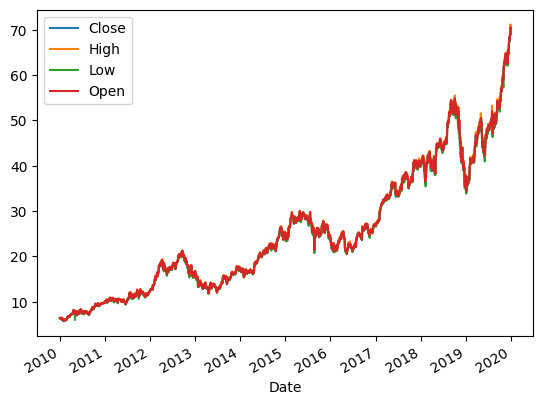

In [12]:
(raw
 .iloc[:,:-2:2]
 .pipe(fix_cols)
 .plot()
)

<Axes: xlabel='Date'>

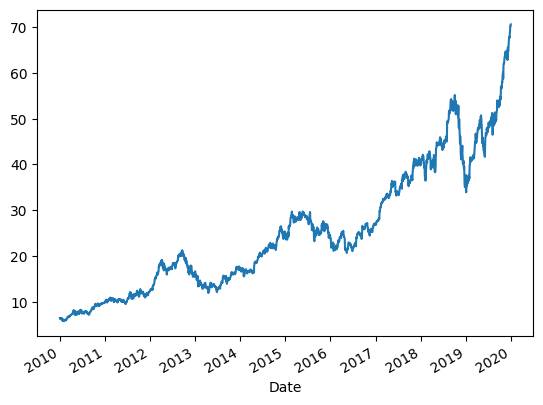

In [13]:
(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .Close
 .plot()
)

<Axes: xlabel='Date'>

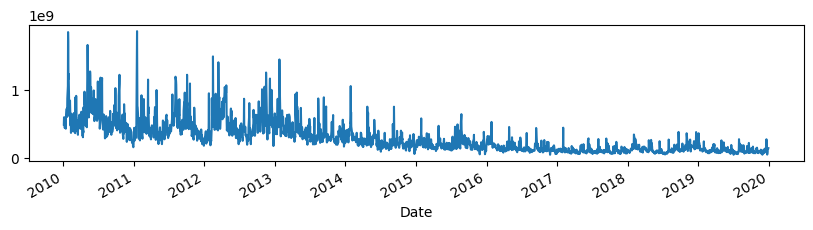

In [14]:
(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .Volume
 .plot(figsize=(10,2))
)

#### Resampling

<Axes: xlabel='Date'>

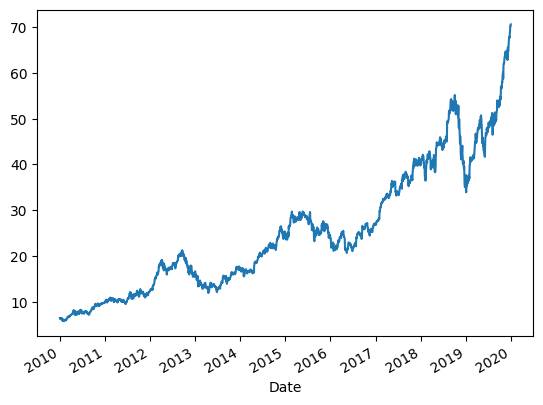

In [15]:
(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .Close
 .plot()
)

In [16]:
(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .Close
)

Date
2010-01-04     6.440330
2010-01-05     6.451466
2010-01-06     6.348846
2010-01-07     6.337110
2010-01-08     6.379241
                ...    
2019-12-23    68.757660
2019-12-24    68.823013
2019-12-26    70.188507
2019-12-27    70.161850
2019-12-30    70.578278
Name: Close, Length: 2515, dtype: float64

In [17]:
(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .resample('M') #offset alias
 .Close
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_27284\271770984.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M') #offset alias


In [18]:
(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .resample('M') #offset alias
 .Close
 .mean()
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_27284\568485902.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M') #offset alias


Date
2010-01-31     6.250900
2010-02-28     5.982480
2010-03-31     6.723237
2010-04-30     7.557965
2010-05-31     7.567382
                ...    
2019-08-31    49.422591
2019-09-30    52.619579
2019-10-31    56.793404
2019-11-30    63.520142
2019-12-31    66.740809
Freq: ME, Name: Close, Length: 120, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_27284\1015692560.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M') #offset alias


<Axes: xlabel='Date'>

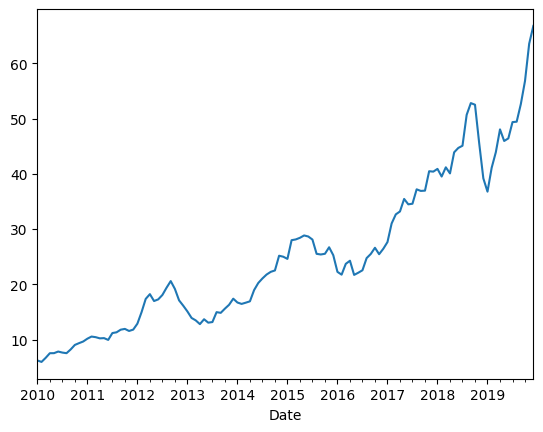

In [19]:
(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .resample('M') #offset alias
 .Close
 .mean()
 .plot()
)

#### Candlestick Plot

,Open,High,Low,Close
Date,,,,
2018-01-01,NaN,NaN,NaN,NaN
2018-01-02,39.986353,40.489237,39.774858,40.479836
2018-01-03,40.543284,41.017971,40.409341,40.472786
2018-01-04,40.545638,40.764183,40.437543,40.660786
2018-01-05,40.757134,41.210668,40.665487,41.123722
...,...,...,...,...
2018-06-26,43.343124,44.181609,43.236534,43.684200
2018-06-27,43.873697,44.359262,43.589465,43.620258
2018-06-28,43.606060,44.105837,43.535002,43.937664


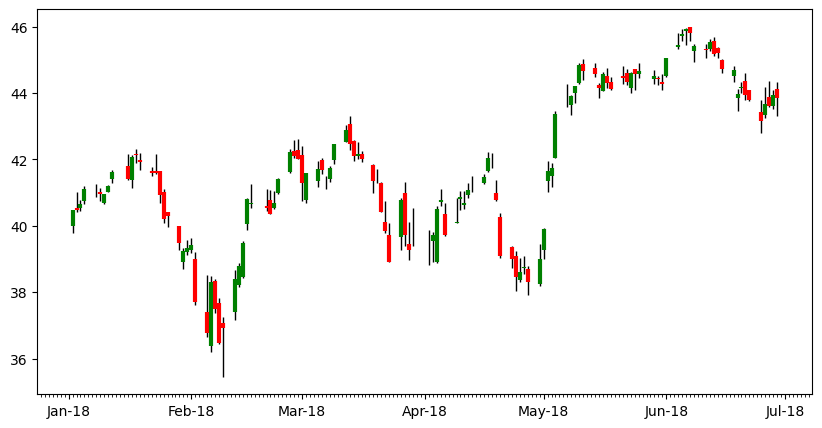

In [20]:
fig, ax=plt.subplots(figsize=(10,5))
def plot_candle(df,ax):
    #wick
    ax.vlines(x=df.index,ymin=df.Low,ymax=df.High,colors="k", linewidth=1)
    #red - decrease
    red=df.query('Open>Close')
    ax.vlines(x=red.index,ymin=red.Close,ymax=red.Open,colors='r',linewidth=3)
    #green - increase
    green=df.query('Open<=Close')
    ax.vlines(x=green.index,ymin=green.Close,ymax=green.Open,colors='g',linewidth=3)

    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y')) #b-month y-year
    ax.xaxis.set_minor_locator(dates.DayLocator())

    return df

(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .resample('d') #w-week d-day m-month
 .agg({'Open':'first','High':'max','Low':'min','Close':'last'})
 .loc['jan 2018':'jun 2018']
 .pipe(plot_candle,ax)
)

#### Challenge

Plot the Candles for the time period of Sep 2019 to Dec 2019.

,Open,High,Low,Close
Date,,,,
2019-09-01,NaN,NaN,NaN,NaN
2019-09-02,NaN,NaN,NaN,NaN
2019-09-03,49.828020,49.960779,49.294573,49.651814
2019-09-04,50.301120,50.564223,50.042846,50.494225
2019-09-05,51.172510,51.648028,51.054233,51.481476
...,...,...,...,...
2019-12-26,68.956196,70.205456,68.927145,70.188507
2019-12-27,70.481430,71.171429,69.755116,70.161850
2019-12-28,NaN,NaN,NaN,NaN


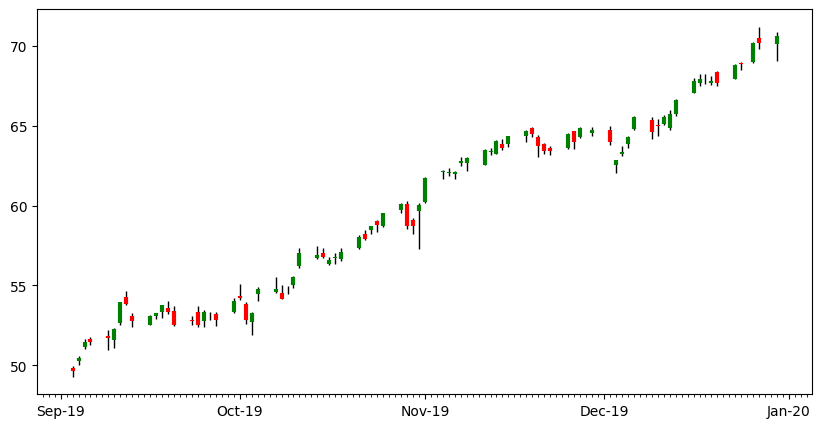

In [21]:
fig, ax=plt.subplots(figsize=(10,5))

(raw
 .iloc[:,::2]
 .pipe(fix_cols)
 .resample('d') #w-week d-day m-month
 .agg({'Open':'first','High':'max','Low':'min','Close':'last'})
 .loc['sep 2019':'dec 2019'] #.loc['sep 2019':'2019'] will also work since it goes till end of the year
 .pipe(plot_candle,ax)
)

The instructor re-initialized the ax object because the initial plot was not displaying correctly. The issue was that Jupyter Notebook did not create a new ax object when reusing the previous code. By re-initializing ax, the instructor ensured that a new plotting area was created, allowing the candlestick plot to display properly. This step is crucial for troubleshooting and ensuring the plot reflects the correct data range.

## Calculations

Goal
- Explore Pandas methods like .pct_change
- Plotting with Pandas
- Refactoring to functions

#### Returns

In [22]:
aapl=(raw
      .iloc[:,::2]
      .pipe(fix_cols))

aapl

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,6.440330,6.455075,6.391277,6.422875,493729600
2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800
2010-01-06,6.348846,6.477045,6.342225,6.451465,552160000
2010-01-07,6.337110,6.379844,6.291067,6.372320,477131200
2010-01-08,6.379241,6.379844,6.291369,6.328684,447610800
...,...,...,...,...,...
2019-12-23,68.757660,68.818186,67.878820,67.917557,98572000
2019-12-24,68.823013,68.973124,68.496178,68.924700,48478800
2019-12-26,70.188507,70.205456,68.927145,68.956196,93121200


In [23]:
#Returns
aapl.pct_change()

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,5.081896e-03,0.004097,0.005482,0.219098
2010-01-06,-0.015906,-1.669972e-03,-0.011723,-0.001025,-0.082646
2010-01-07,-0.001849,-1.500704e-02,-0.008066,-0.012268,-0.135882
2010-01-08,0.006648,3.482831e-08,0.000048,-0.006848,-0.061871
...,...,...,...,...,...
2019-12-23,0.016318,5.660629e-03,0.006498,-0.006024,-0.642827
2019-12-24,0.000950,2.251414e-03,0.009095,0.014829,-0.508189
2019-12-26,0.019841,1.786684e-02,0.006292,0.000457,0.920864


In [24]:
aapl.pct_change?

Signature:
aapl.pct_change(
    periods: 'int' = 1,
    fill_method: 'FillnaOptions | None | lib.NoDefault' = <no_default>,
    limit: 'int | None | lib.NoDefault' = <no_default>,
    freq=None,
    **kwargs,
) -> 'Self'
Docstring:
Fractional change between the current and a prior element.

Computes the fractional change from the immediately previous row by
default. This is useful in comparing the fraction of change in a time
series of elements.

.. note::

    Despite the name of this method, it calculates fractional change
    (also known as per unit change or relative change) and not
    percentage change. If you need the percentage change, multiply
    these values by 100.

Parameters
----------
periods : int, default 1
    Periods to shift for forming percent change.
fill_method : {'backfill', 'bfill', 'pad', 'ffill', None}, default 'pad'
    How to handle NAs **before** computing percent changes.

    .. deprecated:: 2.1
        All options of `fill_method` are deprecated except 

#### Plotting Returns

<Axes: xlabel='Date'>

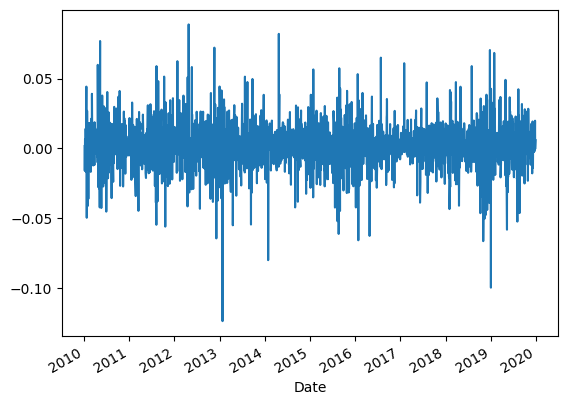

In [25]:
# Plot Returns
(aapl
 .pct_change()
 .Close
 .plot()
)

<Axes: >

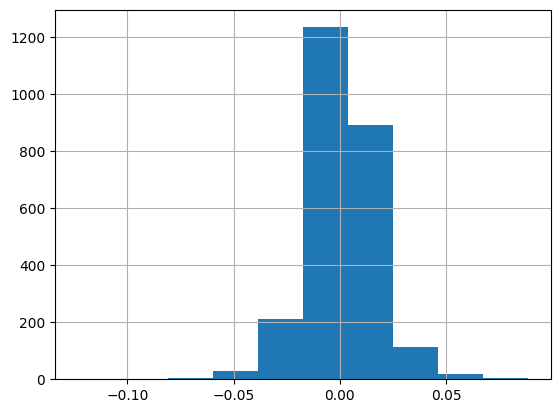

In [26]:
# Histogram of Returns
(aapl
 .pct_change()
 .Close
 .hist()
)

<Axes: >

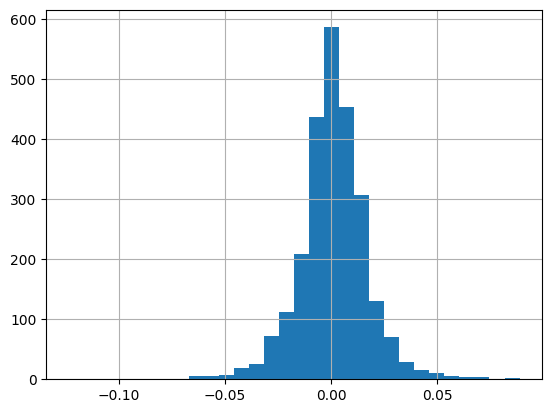

In [27]:
# Change bins
(aapl
 .pct_change()
 .Close
 .hist(bins=30)
)

<Axes: xlabel='Date'>

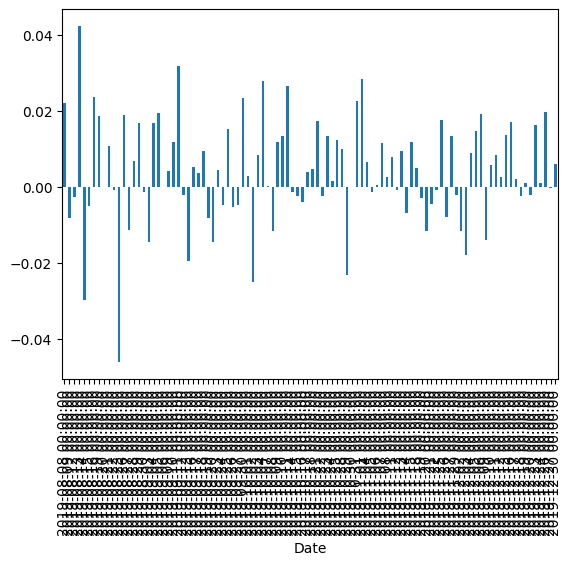

In [28]:
# Understanding plotting in Pandas is a huge lever
# Bar Plot Returns
(aapl
 .pct_change()
 .Close
 .iloc[-100:] #last 100 rows
 .plot.bar()
)

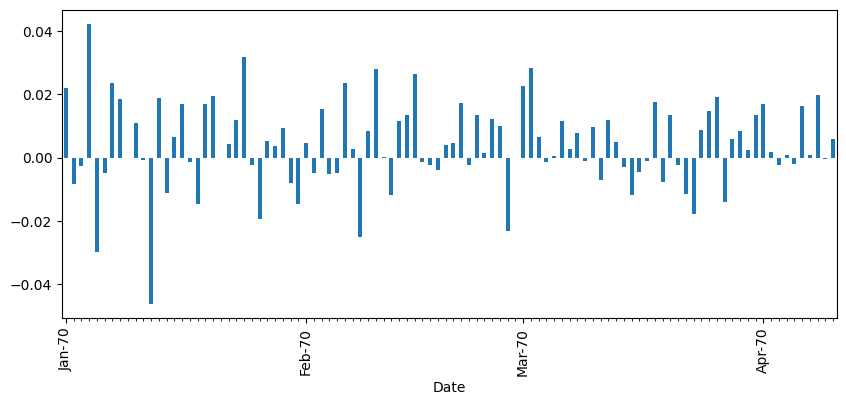

In [29]:
# Bar Plot of Returns
# Sadly dates are broken with pandas bar plots
# 1970s?
fig, ax=plt.subplots(figsize=(10,4))
(aapl
 .pct_change()
 .Close
 .iloc[-100:] #last 100 rows
 .plot.bar(ax=ax)
)

ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
ax.xaxis.set_minor_locator(dates.DayLocator())

In the "Plotting returns" video, the instructor mentions a bug in Pandas related to bar plots. When you create a bar plot in Pandas, it converts the dates in the index to categorical values. This can cause issues with date formatting on the x-axis, making the plot less readable. To address this, the instructor suggests using Matplotlib directly for bar plots, as it handles date formatting correctly.

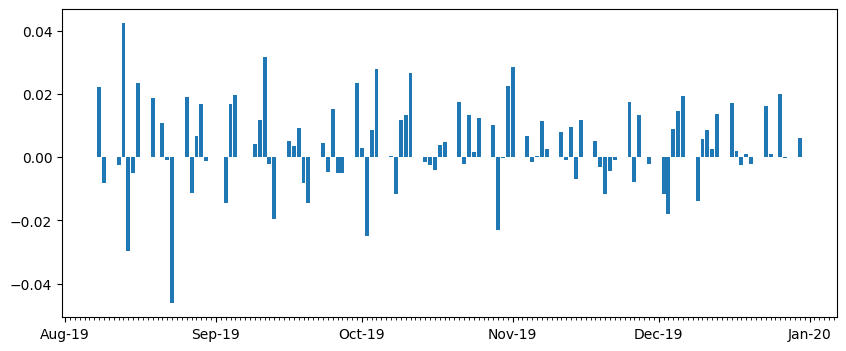

In [30]:
# Returns - using matplotlib
def my_bar(ser, ax):
    ax.bar(ser.index, ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())

    return ser

fig, ax=plt.subplots(figsize=(10,4))
_ = (aapl
 .pct_change()
 .Close
 .iloc[-100:] #last 100 rows
 .pipe(my_bar,ax)
)

#### Cumulative Returns

Goal:
- More complicated Pandas
- Refactoring into a function
- Explore source
- Creating new columns with .assign
- Illustrate lambda

Cumulative Returns is the amount that investment has gained or lost over time:
$$\frac{\text{current\_price} - \text{original\_price}}{\text{original\_price}}$$


<Axes: xlabel='Date'>

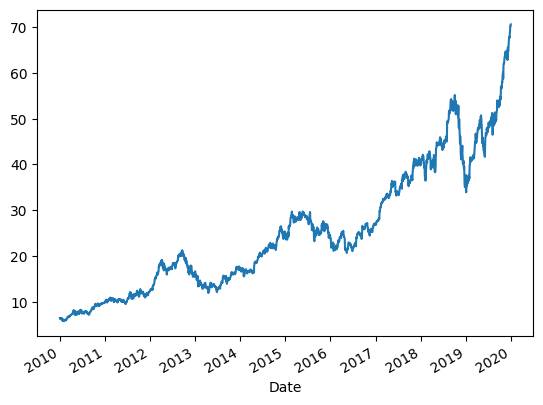

In [31]:
(aapl
 .Close
 .plot()
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_27284\2621645589.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .sub(aapl.Close[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_27284\2621645589.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .div(aapl.Close[0])


<Axes: xlabel='Date'>

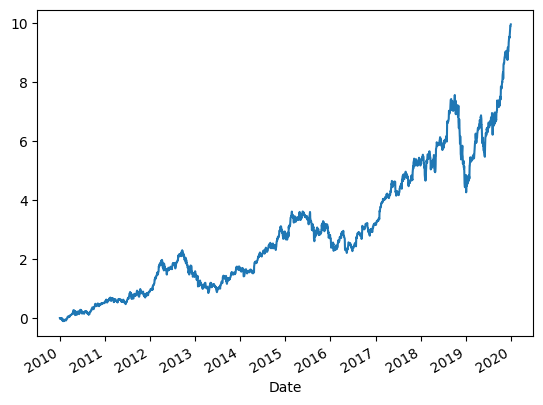

In [32]:
(aapl
 .Close
 .sub(aapl.Close[0])
 .div(aapl.Close[0])
 .plot()
)

<Axes: xlabel='Date'>

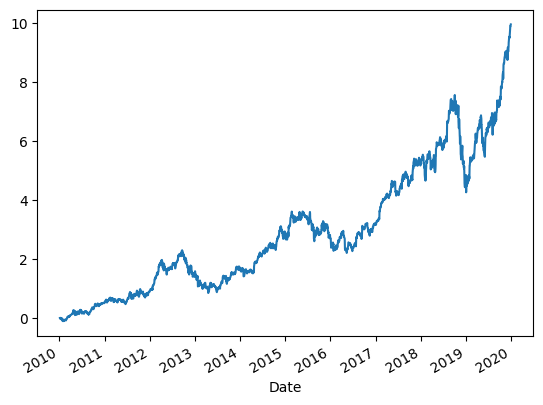

In [33]:
# alternate calculation
(aapl
 .Close
 .pct_change()
 .add(1)
 .cumprod()
 .sub(1)
 .plot()
)

In [34]:
aapl.cumprod??

Signature:
aapl.cumprod(
    axis: 'Axis | None' = None,
    skipna: 'bool' = True,
    *args,
    **kwargs,
)
Docstring:
Return cumulative product over a DataFrame or Series axis.

Returns a DataFrame or Series of the same size containing the cumulative
product.

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, default 0
    The index or the name of the axis. 0 is equivalent to None or 'index'.
    For `Series` this parameter is unused and defaults to 0.
skipna : bool, default True
    Exclude NA/null values. If an entire row/column is NA, the result
    will be NA.
*args, **kwargs
    Additional keywords have no effect but might be accepted for
    compatibility with NumPy.

Returns
-------
Series or DataFrame
    Return cumulative product of Series or DataFrame.

See Also
--------
core.window.expanding.Expanding.prod : Similar functionality
    but ignores ``NaN`` values.
DataFrame.prod : Return the product over
    DataFrame axis.
DataFrame.cummax : Return cumulative ma

In [35]:
pd.core.generic.NDFrame.cumprod??

Signature:
pd.core.generic.NDFrame.cumprod(
    self,
    axis: 'Axis | None' = None,
    skipna: 'bool_t' = True,
    *args,
    **kwargs,
)
Docstring: <no docstring>
Source:   
    def cumprod(self, axis: Axis | None = None, skipna: bool_t = True, *args, **kwargs):
        return self._accum_func("cumprod", np.cumprod, axis, skipna, *args, **kwargs)
File:      d:\python\lib\site-packages\pandas\core\generic.py
Type:      function

In [36]:
np.cumprod??

Signature:       np.cumprod(a, axis=None, dtype=None, out=None)
Call signature:  np.cumprod(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function cumprod at 0x000002022A8F1DA0>
File:            d:\python\lib\site-packages\numpy\core\fromnumeric.py
Source:         
@array_function_dispatch(_cumprod_dispatcher)
def cumprod(a, axis=None, dtype=None, out=None):
    """
    Return the cumulative product of elements along a given axis.

    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        Axis along which the cumulative product is computed.  By default
        the input is flattened.
    dtype : dtype, optional
        Type of the returned array, as well as of the accumulator in which
        the elements are multiplied.  If *dtype* is not specified, it
        defaults to the dtype of `a`, unless `a` has an integer dtype with
        a precision less than that of the default platform integer.  In
        that 

In Jupyter Notebook, using double question marks (??) is a handy way to pull up the source code of a function or method. Here's how it works:

When you type function_name?? and run the cell, Jupyter Notebook will display the source code of that function.
This is useful for understanding how a function works internally, especially if you want to see the implementation details.

For example, if you want to see the source code for the cumprod method in pandas, you would type:
python
pd.Series.cumprod??

This will show you the actual code behind the cumprod method, helping you understand its inner workings.


C:\Users\Admin\AppData\Local\Temp\ipykernel_27284\2246289962.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .sub(ser[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_27284\2246289962.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .div(ser[0])


<Axes: xlabel='Date'>

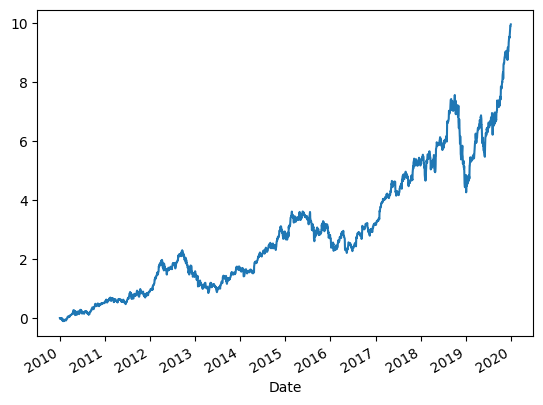

In [37]:
# create a function for calculating
def calc_cum_returns(df,col):
    ser=df[col]
    return (ser
            .sub(ser[0])
            .div(ser[0])
           )

(aapl
 .pipe(calc_cum_returns, 'Close')
 .plot()
)

In [38]:
def get_returns(df):
    return calc_cum_returns(df,'Close')

get_returns(aapl)

C:\Users\Admin\AppData\Local\Temp\ipykernel_27284\2246289962.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .sub(ser[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_27284\2246289962.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .div(ser[0])


Date
2010-01-04    0.000000
2010-01-05    0.001729
2010-01-06   -0.014205
2010-01-07   -0.016027
2010-01-08   -0.009485
                ...   
2019-12-23    9.676109
2019-12-24    9.686256
2019-12-26    9.898279
2019-12-27    9.894140
2019-12-30    9.958799
Name: Close, Length: 2515, dtype: float64

In [39]:
# Lambda is an "anonymous function"

(lambda df: get_returns(df))(aapl)

C:\Users\Admin\AppData\Local\Temp\ipykernel_27284\2246289962.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .sub(ser[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_27284\2246289962.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .div(ser[0])


Date
2010-01-04    0.000000
2010-01-05    0.001729
2010-01-06   -0.014205
2010-01-07   -0.016027
2010-01-08   -0.009485
                ...   
2019-12-23    9.676109
2019-12-24    9.686256
2019-12-26    9.898279
2019-12-27    9.894140
2019-12-30    9.958799
Name: Close, Length: 2515, dtype: float64

In [40]:
# Create a new column
(aapl
 .assign(cum_returns=lambda df:calc_cum_returns(df,'Close'))
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_27284\2246289962.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .sub(ser[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_27284\2246289962.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .div(ser[0])


,Close,High,Low,Open,Volume,cum_returns
Date,,,,,,
2010-01-04,6.440330,6.455075,6.391277,6.422875,493729600,0.000000
2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800,0.001729
2010-01-06,6.348846,6.477045,6.342225,6.451465,552160000,-0.014205
2010-01-07,6.337110,6.379844,6.291067,6.372320,477131200,-0.016027
2010-01-08,6.379241,6.379844,6.291369,6.328684,447610800,-0.009485
...,...,...,...,...,...,...
2019-12-23,68.757660,68.818186,67.878820,67.917557,98572000,9.676109
2019-12-24,68.823013,68.973124,68.496178,68.924700,48478800,9.686256
2019-12-26,70.188507,70.205456,68.927145,68.956196,93121200,9.898279


C:\Users\Admin\AppData\Local\Temp\ipykernel_27284\2246289962.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .sub(ser[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_27284\2246289962.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .div(ser[0])


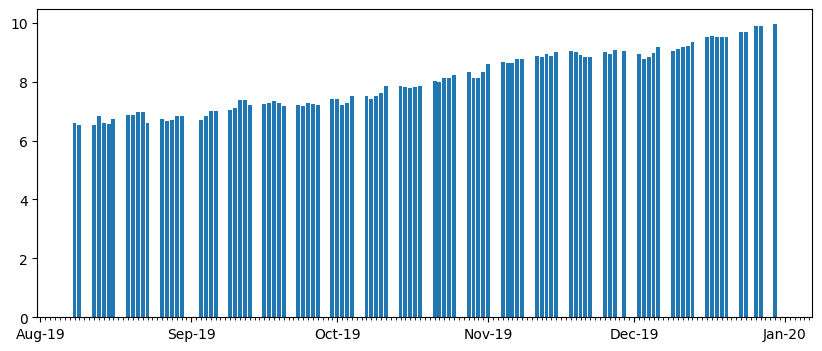

In [41]:
# Returns - using matplotlib
def my_bar(ser, ax):
    ax.bar(ser.index, ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser

fig, ax=plt.subplots(figsize=(10,4))
_=(aapl
   .pipe(calc_cum_returns,'Close')
   .iloc[-100:]
   .pipe(my_bar,ax)
  )

#### Volatility

Goals
- More complicated Pandas
- Learn about rolling operations

In [42]:
(aapl
 .Close
 .mean()
)

25.175469498037106

In [43]:
(aapl
 .Close
 .std() # Standard Deviation
)

13.922277081128502

In [44]:
(aapl
 .assign(pct_change_close=aapl.Close.pct_change())
 .pct_change_close
 .std()
)

0.01622268936041443

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

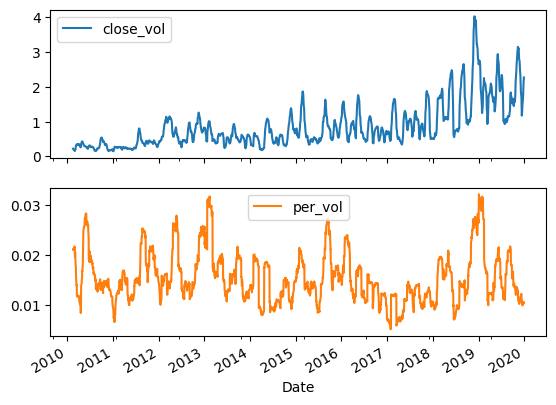

In [45]:
(aapl
 .assign(close_vol=aapl.rolling(30).Close.std(),
         per_vol=aapl.Close.pct_change().rolling(30).std())
 .iloc[:, -2:]
 .plot(subplots=True)
)

In [50]:
# 15 day grouping volatility
(aapl
 .assign(pct_change_close=aapl.Close.pct_change())
 .resample('15D')
 .std()
)

,Close,High,Low,Open,Volume,pct_change_close
Date,,,,,,
2010-01-04,0.077485,0.060719,0.085735,0.067722,7.028347e+07,0.010383
2010-01-19,0.225099,0.213341,0.196210,0.197255,4.361002e+08,0.030046
2010-02-03,0.112227,0.086465,0.104535,0.103936,1.455474e+08,0.017088
2010-02-18,0.135920,0.116794,0.140103,0.133100,9.844200e+07,0.011254
2010-03-05,0.073733,0.074226,0.095594,0.109105,1.951401e+08,0.014002
...,...,...,...,...,...,...
2019-10-29,1.730893,1.468402,2.011539,1.436137,2.960150e+07,0.013529
2019-11-13,0.511106,0.391936,0.422920,0.493494,1.787058e+07,0.009868
2019-11-28,0.967303,0.987579,0.889833,0.906969,2.826525e+07,0.012526


In [52]:
# 15 day rolling volatility
(aapl
 .assign(pct_change_close=aapl.Close.pct_change())
 .rolling(window=15, min_periods=15)
 .std()
)

,Close,High,Low,Open,Volume,pct_change_close
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2019-12-23,1.829105,1.871221,1.892016,1.846375,4.891036e+07,0.010997
2019-12-24,1.718820,1.706490,1.784707,1.778859,5.206250e+07,0.009136
2019-12-26,1.740369,1.701599,1.763584,1.702659,5.084715e+07,0.009786


- **Window**: This parameter specifies the size of the moving window. For example, if you set window=30, it means the rolling calculation will consider the last 30 data points for each computation.
- **min_periods**: This parameter specifies the minimum number of observations in the window required to have a value. For example, if you set min_periods=1, the rolling calculation will produce a result even if there's only one data point in the window. If not specified, it defaults to the window size.


These parameters help in customizing the rolling calculations to suit your data analysis needs.

<Axes: xlabel='Date'>

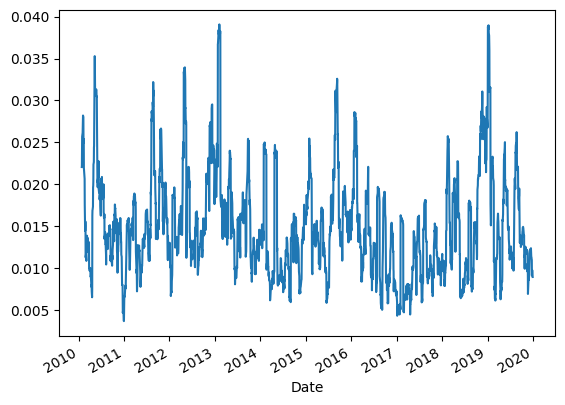

In [55]:
# 15 day volatility
# note if column name conflicts with method need to use
# index access ([])
(aapl
 .assign(pct_change=aapl.Close.pct_change())
 .rolling(window=15,min_periods=15)
 .std()
 # .pct_change
 ['pct_change']
 .plot()
)

In the "Volatility" video, the instructor uses df['pct_change'] instead of df.pct_change because pct_change is a built-in method of the pandas DataFrame. Using df.pct_change would call the method instead of accessing the column. To avoid this conflict and correctly access the column, the ['pct_change'] syntax is used. This ensures you're referring to the column and not the method.

#### Challenge

Plot the rolling volatility over 30-day sliding windows for 2015-2019

<Axes: xlabel='Date'>

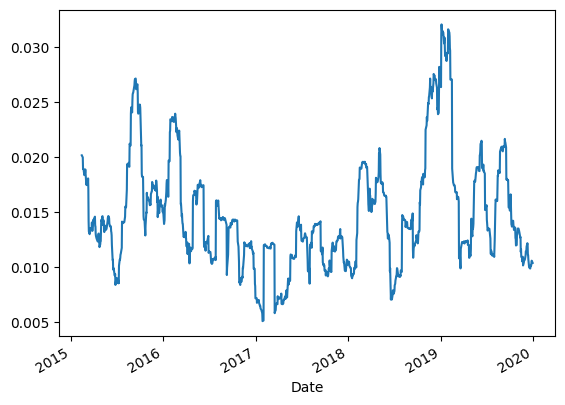

In [64]:
(aapl
 .assign(pct_change=aapl.Close.pct_change())
 .loc['2015':'2019']
 .rolling(window=30,min_periods=30) # .rolling(30,min_periods=30)
 .std()
 ['pct_change']
 .plot()
)